# NYC Taxi data

## Import cuXfilter

In [ ]:
from cuXfilter import charts
import cuXfilter
from bokeh import palettes
from cuXfilter.layouts import double_feature

import cudf

In [ ]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [2]:
from cuXfilter.sampledata import datasets_check
datasets_check('nyc_taxi', base_dir=DATA_DIR)

Dataset - ./data/nyc_taxi.csv

dataset already downloaded


## preprocess the data

In [3]:
!pip install pyproj

cudf_df = cudf.read_csv('./data/nyc_taxi.csv')

from pyproj import Proj, transform

inProj = Proj(init='epsg:4326') # Latitude and longitudes
outProj = Proj(init='epsg:3857') # 2D projected points

cudf_df['dropoff_x'], cudf_df['dropoff_y'] = transform(inProj, outProj, cudf_df['dropoff_longitude'].values, cudf_df['dropoff_latitude'].values) # Apply transformation

cudf_df = cudf_df.drop(['dropoff_latitude', 'dropoff_longitude'], axis=1)
cudf_df = cudf_df.dropna(axis=0)


cudf_df = cudf_df[(cudf_df.dropoff_x > -8239910.23) & (cudf_df.dropoff_x < -8229529.24) & (cudf_df.dropoff_y > 4968481.34) & (cudf_df.dropoff_y < 4983152.92)] # Filter over Manhattan


cudf_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_x,dropoff_y
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,1,12.0,1.0,0.5,3.25,0.00,0.3,17.05,-8.234835e+06,4.975627e+06
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,1,14.5,0.5,0.5,2.00,0.00,0.3,17.80,-8.237021e+06,4.976875e+06
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,2,3.5,0.5,0.5,0.00,0.00,0.3,4.80,-8.238124e+06,4.971127e+06
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,-8.238108e+06,4.974457e+06
5,1,2015-01-10 20:33:39,2015-01-10 20:53:52,1,9.00,-73.874374,40.774048,1,N,1,27.0,0.5,0.5,6.70,5.33,0.3,40.33,-8.236193e+06,4.976740e+06


## Read the dataset

In [4]:
cux_df = cuXfilter.DataFrame.from_dataframe(cudf_df)

## Define charts

In [5]:
from bokeh.tile_providers import get_provider as gp
tile_provider = gp('CARTODBPOSITRON')

> Uncomment the below lines and replace MAPBOX_TOKEN with mapbox token string if you want to use mapbox map-tiles. Can be created for free here -https://www.mapbox.com/help/define-access-token/

In [6]:
#from cuXfilter.assets.custom_tiles import get_provider, Vendors
#tile_provider = get_provider(Vendors.MAPBOX_LIGHT, access_token=MAPBOX_TOKEN)

In [7]:
chart1 = charts.cudatashader.scatter_geo(x='dropoff_x',
                                         y='dropoff_y',
                                         aggregate_fn='count',
                                         tile_provider=tile_provider, x_range=(-8239910.23,-8229529.24), y_range=(4968481.34,4983152.92))

chart2 = charts.bokeh.bar('passenger_count', data_points=9)

## Create a dashboard object

In [8]:
d = cux_df.dashboard([chart1, chart2], layout=double_feature, theme=cuXfilter.themes.dark, title= 'NYC TAXI DATASET')

In [9]:
#dashboard object
d

#### cuXfilter DashBoard
    
    [title] Markdown(str)
    [chart1] Column(sizing_mode='scale_both', width=900)
        [0] Bokeh(Figure)
    [chart2] Column(sizing_mode='scale_both', width=900)
        [0] Bokeh(Figure)
        [1] RangeSlider(end=9, sizing_mode='scale_width', step=1, value=(0, 9), width=900)
    [widgets] Column
        [0] Column(css_classes=['non-handle-temp'], sizing_mode='scale_both')
            [0] FloatSlider(bar_color='#8735fb', end=11075631, name='Data Points selected', sizing_mode='scale_both', start=0, value=11075631, width=280)

## Starting the dashboard

1. d.show('url you want the dashboard to run') remote dashboard

2. d.app('10.110.47.43:8888') within the notebook: If you are using jupyter remotely, use this line instead of second, and replace url with current notebook url

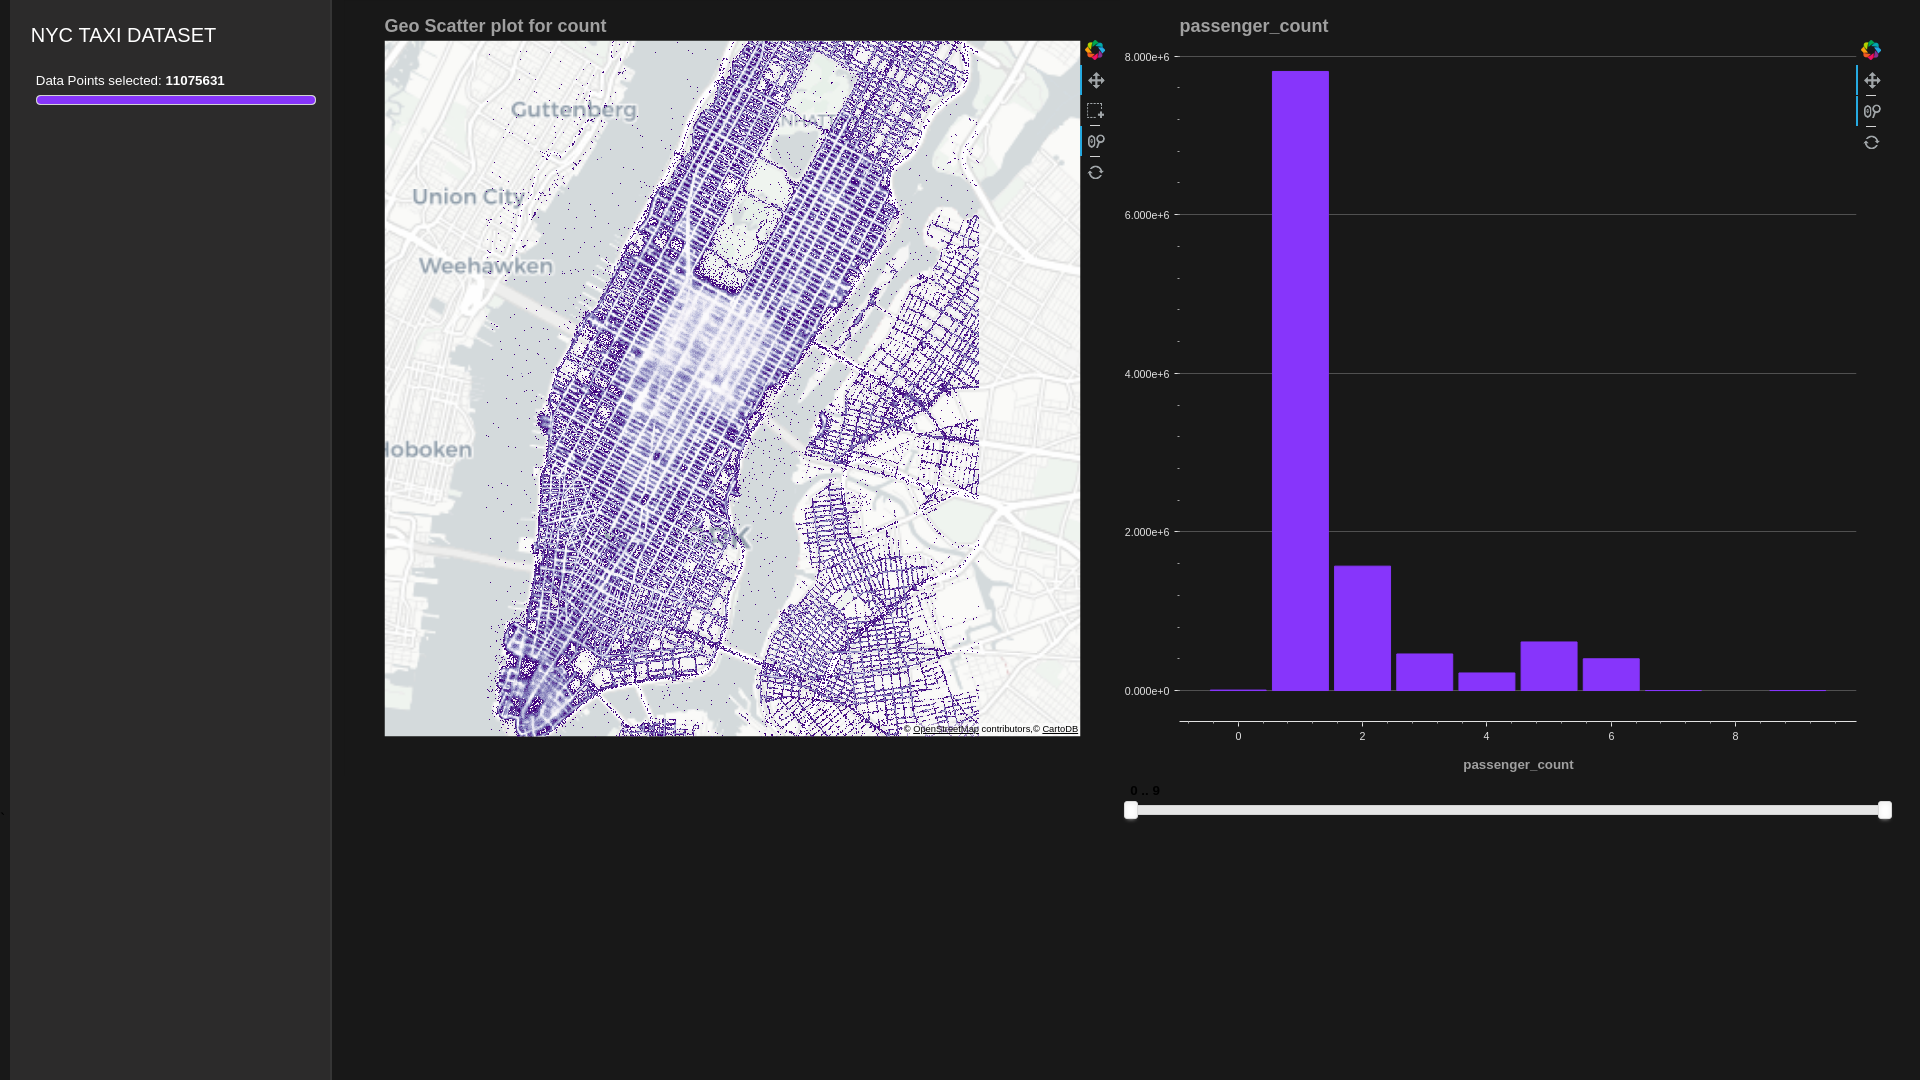

In [10]:
# preview 
await d.preview()

## Export the queried data into a dataframe

In [11]:
queried_df = d.export()

no querying done, returning original dataframe
